In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# import data
filename = 'FigS4B_data.xlsx'
xl = pd.ExcelFile(filename)

# extract Fp data for each sample
fp_ip = xl.parse('figS4B_clean', index_col = 0, header = 0).reset_index()

# transform to long format for downstream process
ip_long = pd.melt(fp_ip, id_vars='index', value_name='Fp')
ip_long.rename(columns = {'variable':'Replicate', 'index':'SampleID'}, inplace = True)


# annotate chemical condition types
atcs = np.tile(np.array([0, 0.01, 0.1, 1, 10, 100]),16)
kans = np.tile(np.repeat(np.array(['0 kan', '50 kan']),12),4)
lins = np.tile(np.repeat(np.array(['0 lin', '3.2 lin']),6),8)

ip_long.insert(1, 'Lin', lins)
ip_long.insert(1, 'Kan', kans)
ip_long.insert(1, 'ATc', atcs)

ip_long

,SampleID,ATc,Kan,Lin,Replicate,Fp
0,Sample_01,0.00,0 kan,0 lin,rep1,0.520388
1,Sample_02,0.01,0 kan,0 lin,rep1,0.552809
2,Sample_03,0.10,0 kan,0 lin,rep1,0.377011
3,Sample_04,1.00,0 kan,0 lin,rep1,0.068843
4,Sample_05,10.00,0 kan,0 lin,rep1,0.006506
...,...,...,...,...,...,...
91,Sample_20,0.01,50 kan,3.2 lin,rep4,0.755556
92,Sample_21,0.10,50 kan,3.2 lin,rep4,0.847500
93,Sample_22,1.00,50 kan,3.2 lin,rep4,0.072381
94,Sample_23,10.00,50 kan,3.2 lin,rep4,0.005758


In [3]:
## create a new column for ATc concentrations where 0 is replaced by 0.001 for plotting purposes
atc_for_log = ip_long['ATc'].replace(0, 0.001)
ip_long.insert(2, 'ATc for log plotting', atc_for_log)  
ip_long.head()

,SampleID,ATc,ATc for log plotting,Kan,Lin,Replicate,Fp
0,Sample_01,0.00,0.001,0 kan,0 lin,rep1,0.520388
1,Sample_02,0.01,0.010,0 kan,0 lin,rep1,0.552809
2,Sample_03,0.10,0.100,0 kan,0 lin,rep1,0.377011
3,Sample_04,1.00,1.000,0 kan,0 lin,rep1,0.068843
4,Sample_05,10.00,10.000,0 kan,0 lin,rep1,0.006506


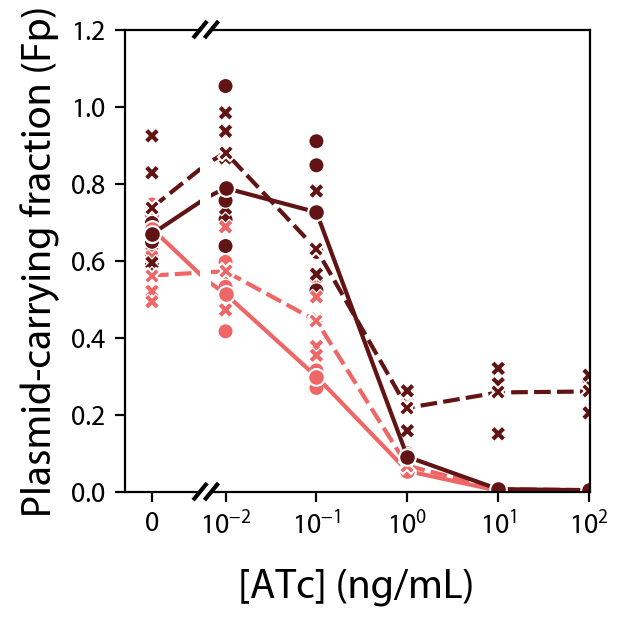

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(3, 3), sharey = False, dpi = 200, width_ratios=[1, 5])
plt.subplots_adjust(
                    wspace=0.05, 
                    )
plt.rcParams['font.sans-serif'] = "Myriad Pro"


sns.lineplot(data = ip_long, x = 'ATc for log plotting', y = 'Fp', hue = 'Kan', style = 'Lin',
             style_order = ['3.2 lin', '0 lin'], palette=['#EF6666', '#621313'], markers = ['o', 'X'],
             ax = axes[0], errorbar = None)

sns.lineplot(data = ip_long, x = 'ATc for log plotting', y = 'Fp', hue = 'Kan', style = 'Lin',
             style_order = ['3.2 lin', '0 lin'],palette=['#EF6666', '#621313'], markers = ['o', 'X'],
             ax = axes[1], errorbar = None)

sns.scatterplot(data = ip_long, x = 'ATc for log plotting', y = 'Fp', hue = 'Kan', style = 'Lin',
             style_order = ['3.2 lin', '0 lin'], palette=['#EF6666', '#621313'], markers = ['o', 'X'],
             ax = axes[0], s = 30, color = ".2")

sns.scatterplot(data = ip_long, x = 'ATc for log plotting', y = 'Fp', hue = 'Kan', style = 'Lin',
             style_order = ['3.2 lin', '0 lin'],palette=['#EF6666', '#621313'], markers = ['o', 'X'],
             ax = axes[1], s = 30, color = ".2")


axes[0].get_legend().remove()
axes[1].get_legend().remove()

axes[0].set_xlim([0.0004, 0.005])
axes[1].set_xlim([0.007, 101])

axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[0].set_xticks([0.001])
axes[0].set_xticklabels(['0'])
axes[0].minorticks_off()

axes[0].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].set_yticks([])
axes[1].set_ylabel('')

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=axes[0].transAxes, color='k', clip_on=False)
axes[0].plot((1-5*d, 1+5*d), (-d, +d), **kwargs)
axes[0].plot((1-5*d, 1+5*d), (1-d, 1+d), **kwargs)

kwargs.update(transform=axes[1].transAxes)  # switch to the bottom axes
axes[1].plot((-d, +d), (1-d, 1+d), **kwargs)
axes[1].plot((-d, +d), (-d, +d), **kwargs)

axes[0].set_ylabel('')
axes[1].set_ylabel('')

axes[0].set_ylabel('Plasmid-carrying fraction (Fp)', fontsize = 15)
axes[0].set_xlabel('')
axes[1].set_xlabel('[ATc] (ng/mL)          ', fontsize = 15, labelpad = 10, ha='center')

axes[0].set_ylim([0, 1.2])
axes[1].set_ylim([0, 1.2])
axes[1].set_xticks([1e-2, 1e-1, 1e0, 1e1, 1e2])

plt.show()